(c) 2021 Jose Angel de Bustos Perez

Distributed under GPLv3 License (https://www.gnu.org/licenses/gpl-3.0.en.html)

# WordClouds as a Service (WaaS)
This Notebook will help you to create WordClouds for your presentations or whatever.

In [2]:
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import os
import itertools
import numpy as np
import pandas as pd
import ipywidgets as widgets

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

# Define words to include in the word cloud

Include all the words you want to appear in the word cloud in the following array:

In [34]:
words=['In-place upgrades', 'Convert2RHEL', 'Image Builder', 'Insights', 'Compliance', 'Easier management', 'IdM', 'FIPS', 'ELS', 'EUS', 'EEUS', 'Hybrid Cloud',
       'Certifications', 'SAP', 'Microsoft SQL Server', 'Container Tools', 'Image Mode', 'Resilient Storage', 'Directory Server'
       'System roles', 'Web console', 'Session recording', 'Red Hat Satellite', 'High-Availability Add On (HA)', 'Developer tools', 'Developer4Teams', 'Lightspeed']

The following cell will create slide bars where you can configure the frecuency each word will appear.

In [35]:
slide_bars = []

for item in words:
    slide_bar = widgets.IntSlider(
    value=1,
    min=1,
    max=100,
    step=1,
    description=item,
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
    )
    
    slide_bars.append(slide_bar)

for item in slide_bars:
    display(item)

IntSlider(value=1, continuous_update=False, description='In-place upgrades', min=1)

IntSlider(value=1, continuous_update=False, description='Convert2RHEL', min=1)

IntSlider(value=1, continuous_update=False, description='Image Builder', min=1)

IntSlider(value=1, continuous_update=False, description='Insights', min=1)

IntSlider(value=1, continuous_update=False, description='Compliance', min=1)

IntSlider(value=1, continuous_update=False, description='Easier management', min=1)

IntSlider(value=1, continuous_update=False, description='IdM', min=1)

IntSlider(value=1, continuous_update=False, description='FIPS', min=1)

IntSlider(value=1, continuous_update=False, description='ELS', min=1)

IntSlider(value=1, continuous_update=False, description='EUS', min=1)

IntSlider(value=1, continuous_update=False, description='EEUS', min=1)

IntSlider(value=1, continuous_update=False, description='Hybrid Cloud', min=1)

IntSlider(value=1, continuous_update=False, description='Certifications', min=1)

IntSlider(value=1, continuous_update=False, description='SAP', min=1)

IntSlider(value=1, continuous_update=False, description='Microsoft SQL Server', min=1)

IntSlider(value=1, continuous_update=False, description='Container Tools', min=1)

IntSlider(value=1, continuous_update=False, description='Image Mode', min=1)

IntSlider(value=1, continuous_update=False, description='Resilient Storage', min=1)

IntSlider(value=1, continuous_update=False, description='Directory ServerSystem roles', min=1)

IntSlider(value=1, continuous_update=False, description='Web console', min=1)

IntSlider(value=1, continuous_update=False, description='Session recording', min=1)

IntSlider(value=1, continuous_update=False, description='Red Hat Satellite', min=1)

IntSlider(value=1, continuous_update=False, description='High-Availability Add On (HA)', min=1)

IntSlider(value=1, continuous_update=False, description='Developer tools', min=1)

IntSlider(value=1, continuous_update=False, description='Developer4Teams', min=1)

IntSlider(value=1, continuous_update=False, description='Lightspeed', min=1)

The following cell create data structure to create the charts based on the above word distribution. Every time you modify the distribution you need to reexcute the cell to update data:

In [36]:
# number of word occurrencies
data = {}
# frecuencies for each word
frecuency = {}

# labels and frecuencies
frecuencies = []
labels = []

# total occurencies
total = 0

# create data dictionary
for item in range(0,len(slide_bars)):
    data[slide_bars[item].description] = slide_bars[item].value
    total += slide_bars[item].value

# frecuencies
for item in range(0,len(slide_bars)):
    frecuency[slide_bars[item].description] = slide_bars[item].value * 100./total
    labels.append(slide_bars[item].description)
    frecuencies.append(slide_bars[item].value * 100./total)

The following cell will plot the frecuency distribution for the words to check if the results are those you are looking for.

In the pie chart you can group words with small frecuency setting **group_limit**. All words with a frecuency smaller than that (%) will be grouped to be shown in the chart:

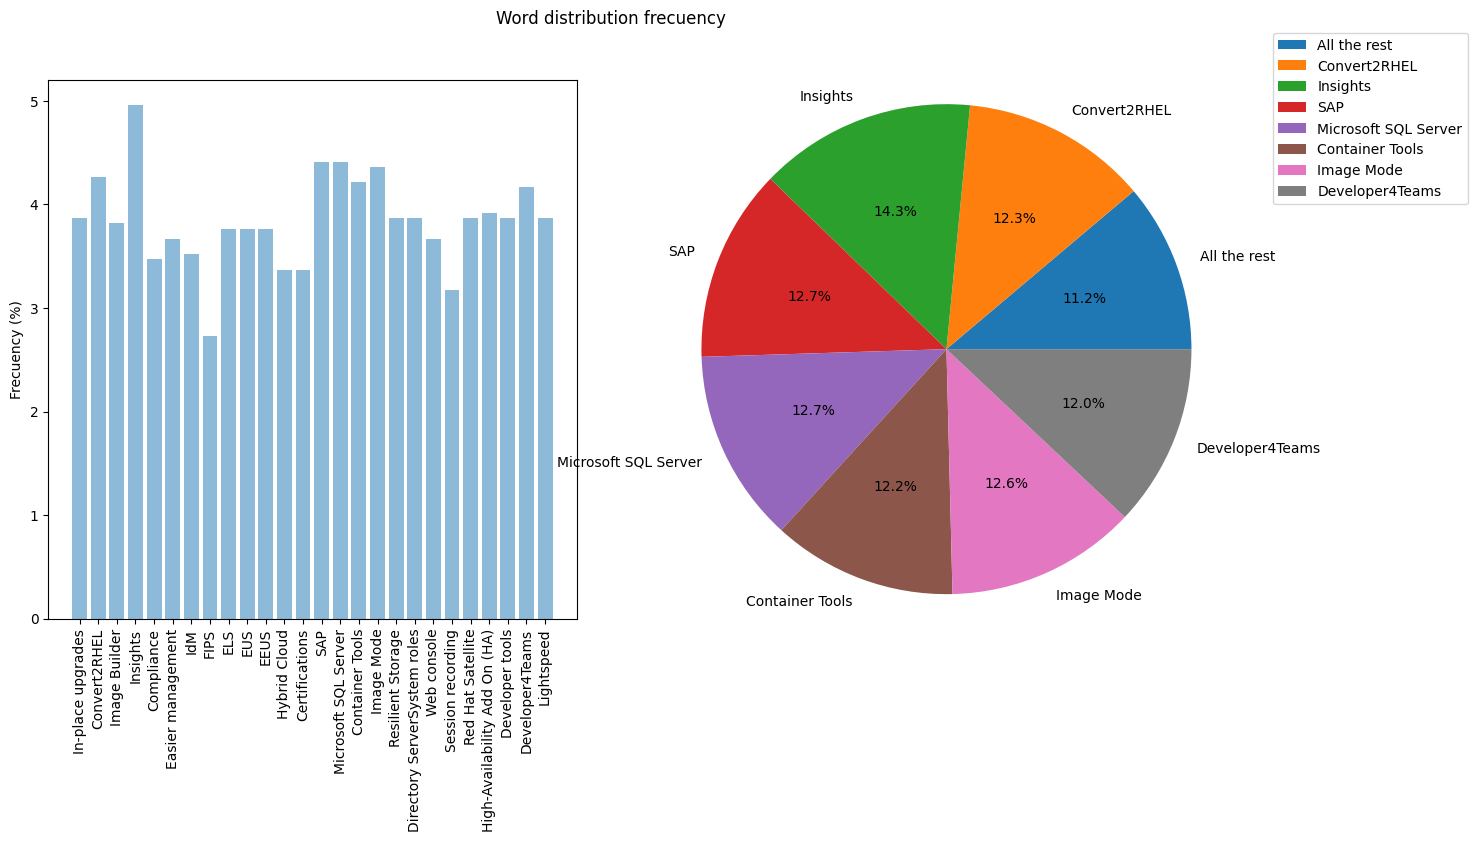

In [37]:
# Those words with occurrency frequency less than group_limit will be grouped in the pie chart
group_limit = 4

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))
fig.suptitle('Word distribution frecuency')

# bar chart
ax1.bar(data.keys(), frecuencies, align='center', alpha=0.5)
y_pos = np.arange(len(data.keys()))
ax1.set(ylabel='Frecuency (%)')
ax1.set_xticklabels(data.keys(), rotation=90) 

# pie chart
grouped={}

# group elements
for key, group in itertools.groupby(frecuency, lambda k: 'All the rest' if (frecuency[k] < group_limit) else k):
     grouped[key] = sum([frecuency[k] for k in list(group)])   

labels = grouped.keys()
grouped_frecs = grouped.values()

ax2.pie(grouped_frecs, labels=labels, autopct='%1.1f%%', startangle=0)
ax2.axis('equal')
ax2.legend(labels, bbox_to_anchor=(1.5,1.1), loc="upper right")

# Create the WordCloud

When you are confortamble with the word distibution execute the following cell to create a text based on the above word distribution:

In [38]:
text = ''

for item in data.keys():
    text += (item + ' ') * data[item]

## Create a simple WordCloud

Modify the **width** and **height** values to fit the size for the image. The image will be stored in the same directory the the notebook is placed:

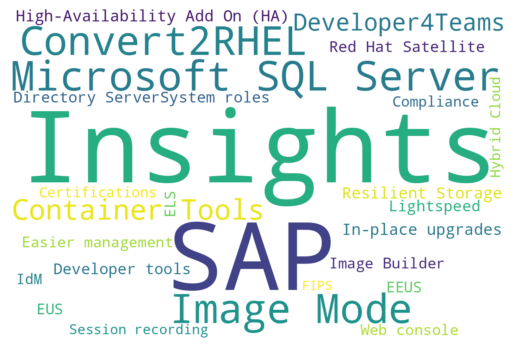

In [39]:
width=1200
height=800

wc = WordCloud(background_color="white", width=width, height=height, max_words=len(data.keys()), 
               contour_width=3, contour_color='steelblue')

# generate word cloud
wc.generate_from_frequencies(frecuency)

plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

wc.to_file('simple-cloud-word.png')

## Create a WordCloud using arbirtrary shapes

Modify the **shape** variable to set a file to be used as a shape. Requirements:

* The file must be in the same directory that the playbook is placed or you must include the full path.
* The image can only have two colors, white and black. WordCloud will be created in the black part.
* The image file has to be 8-bit/color RGBA. You can easily convert it using GIMP and exporting the image to that format if necessary.

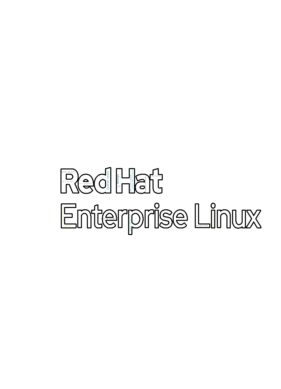

In [26]:
shape = "ansible-mask.png"

shape_mask = np.array(Image.open(shape))

wc = WordCloud(background_color="white", contour_width=3, max_words=len(data.keys()), mask=shape_mask)

# generate word cloud
wc.generate_from_frequencies(frecuency)

plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

wc.to_file('shape-cloud-word.png')